In [1]:
import numpy as np

In [2]:
train = []
with open('hw3_train.dat', 'r') as f:
    for line in f:
        train.append(line.split())
train = np.array(train).astype(float)

In [3]:
test = []
with open('hw3_test.dat', 'r') as f:
    for line in f:
        test.append(line.split())
test = np.array(test).astype(float)

In [4]:
# 0/1 score
def score(y_true, y_pred):
    return (y_true==y_pred).sum()/len(y_true)

In [91]:
class stump():
    
    def __init__(self):
        self.decision = {}
    
    def fit(self, x, y, weight, step=10):
        
        data, label = x, y
        n_data, n_feature = data.shape
        min_err = np.inf
        
        for i in range(n_feature):
            feature_val = x[:, i]
            tmp = [(i,j) for i,j in zip(feature_val, y)]
            tmp = np.array(tmp, dtype=[('val', float), ('label', float)])
            sss = np.sort(tmp, order='val')
            for j in range(len(sss)-1):
                for rule in ['l', 'g']:
                    threshold = (sss[j][0]+sss[j+1][0])/2
                    params = {'feature_idx':i, 'threshold':threshold, 'rule':rule}
                    pred = self.predict(data, **params)
                    err = (pred!=label)
                    weight_err = np.dot(weight.T, err)
                    if weight_err < min_err:
                        min_err = weight_err
                        self.pred = pred.copy()
                        self.decision = params
        
        return self.pred, min_err
                        
                        
    def predict(self, data, threshold=0, feature_idx=0, rule='l'):
        results = np.ones((len(data)))
        feature_val = data[:, feature_idx]
        if rule == 'l':
            results[np.where(feature_val <= threshold)] = -1.0
        elif rule == 'g':
            results[np.where(feature_val > threshold)] = -1.0
        return results  

In [113]:
import copy
class Adaboost():
    
    def __init__(self):
        self.stump_list = []
        self.model_weights = []
        self.Eing = []
        self.Eoutg = []
        self.EinG = []
        self.EoutG = []
        self.U = []
    
    def fit(self, x, y, it=300):
        stump_list = []
        model_weights = []
        n_data, n_feature = x.shape
        data_weights = np.ones((n_data)) / n_data
        
        for i in range(it):
            self.U.append(data_weights.sum())
            st = stump()
            pred, err = st.fit(x, y, data_weights)
            model_weight = 0.5*np.log((1.0-err)/max(err, 1e-16))
            data_weights = data_weights * np.exp(-1.0*model_weight*y.T*pred)
            data_weights = data_weights / np.sum(data_weights)
            
            self.stump_list.append(st)
            self.model_weights.append(model_weight)
            #print ('weighted err:', err, '0/1 err:', 1-score(pred, y), 'alpha:', model_weight)
            self.Eing.append(1-score(st.predict(train[:,:2], **st.decision), train[:,2]))
            self.Eoutg.append(1-score(st.predict(test[:,:2], **st.decision), test[:,2]))
            self.EinG.append(1-score(self.predict(train[:,:2]), train[:,2]))
            self.EoutG.append(1-score(self.predict(test[:,:2]),test[:,2]))
            
    
    def predict(self, x):
        result = np.zeros((x.shape[0]))
        for st, mw in zip(self.stump_list, self.model_weights):
            pred = st.predict(x, **st.decision)
            result += pred*mw
        return np.sign(result)

In [114]:
data, label = train[:, :2], train[:, 2]
model = Adaboost()
model.fit(data, label, it=300)
pred = model.predict(data)
print ('Ein:', 1-score(pred, label))

data, label = test[:, :2], test[:, 2]
pred = model.predict(data)
print ('Eout:', 1-score(pred, label))

Ein: 0.0
Eout: 0.132


In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

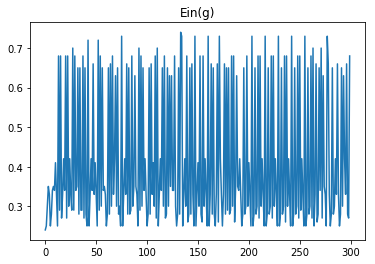

Ein(g1) 0.24 alpha 1: 0.5763397549691927


In [112]:
# 11
t = list(range(300))
plt.title('Ein(g)')
plt.plot(t, model.Eing)
plt.show()
print ('Ein(g1)', model.Eing[0], 'alpha 1:', model.model_weights[0])

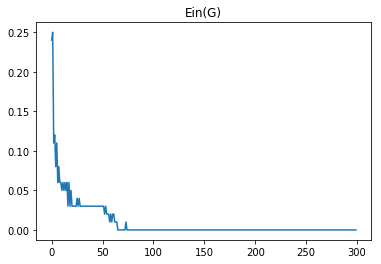

Ein(G) 0.0


In [109]:
# 13
t = list(range(300))
plt.title('Ein(G)')
plt.plot(t, model.EinG)
plt.show()
print ('Ein(G)', model.EinG[-1])

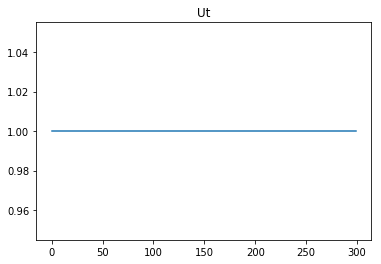

U2 0.9999999999999996


In [115]:
# 14
t = list(range(300))
plt.title('Ut')
plt.plot(t, model.U)
plt.show()
print ('U2', model.U[1])

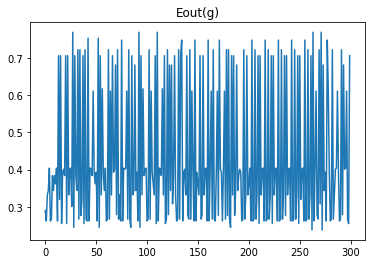

Eout(g1) 0.29000000000000004


In [117]:
# 11
t = list(range(300))
plt.title('Eout(g)')
plt.plot(t, model.Eoutg)
plt.show()
print ('Eout(g1)', model.Eoutg[0])

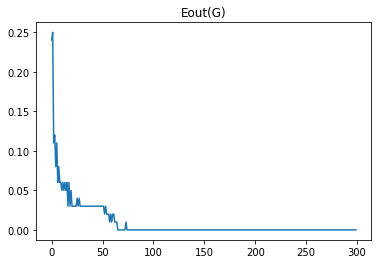

Eout(G) 0.132


In [121]:
# 16
t = list(range(300))
plt.title('Eout(G)')
plt.plot(t, model.EinG)
plt.show()
print ('Eout(G)', model.EoutG[-1])